In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")



UsageError: Line magic function `%` not found.


In [ ]:
#import csv file as panda dataframe

In [31]:
df=pd.read_csv("student.csv")

In [32]:
df.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [33]:
df.shape

(1000, 8)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


2.3.	Data check to perform:
Checking missing values 
Checking duplicate values 
Checking data types 
Checking the number of unique values of each column
Checking statistics of dataset
Checking the various categories present in the different categorical columns. 


In [35]:
# checking missing values:
# there is no missing values in case of having missing values based on the type of the missing values
# the relationship between missing value feature and output and other feature we can handle and impute it
# with mean-mediam or mode (MCAR), creating the sample values equal to missing values and replacing missing values with them using the same index
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

there are no missing values

In [18]:
# checking the duplicate data
# if there were duplicate data, we could use the below code to find and remove dplicate data
# import pandas as pd
# from typhon.data import deduplicate

# # Load CSV dataset into a pandas dataframe
# df = pd.read_csv('your_file.csv')

# # Deduplicate dataframe using Typhon
# df = deduplicate(df)

# # Save deduplicated dataframe to a new CSV file
# df.to_csv('deduplicated_file.csv', index=False)
# df.duplicated().sum()

0

In [36]:
df.value_counts()


gender  race/ethnicity  parental level of education  lunch         test preparation course  math score  reading score  writing score
female  group A         associate's degree           free/reduced  none                     37          57             56               1
male    group C         associate's degree           standard      completed                57          54             56               1
                                                     free/reduced  completed                60          51             56               1
                                                                                            65          67             65               1
                                                                                                        73             68               1
                                                                                                                                       ..
female  group D         associate's deg

In [37]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [38]:
# checking the statistics of the data 
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


all the means are close to each other 
std are also almost the same 
min for math is zero while for reading and writing is 17 and 10 which is totally different from math 

In [39]:
# exploring data
print(df["gender"].unique())
print(df["lunch"].unique())
print(df["parental level of education"].unique())
print(df["race/ethnicity"].unique())
print(df["test preparation course"].unique())


['female' 'male']
['standard' 'free/reduced']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['group B' 'group C' 'group A' 'group D' 'group E']
['none' 'completed']


In [40]:
# dividing the features into numerical or nominal features 
categorical_features=[features for features in df.columns if df[features].dtypes=="O"]
numerical_features=[features for features in df.columns if df[features].dtypes != "O" ]

In [41]:
categorical_features
print(numerical_features)

['math score', 'reading score', 'writing score']


In [35]:
print("there are {}  numerical features : {}".format(len(numerical_features),numerical_features))
print("there are {}  categorical features : {}".format(len(categorical_features),categorical_features))

there are 3  numerical features : ['math score', 'reading score', 'writing score']
there are 5  categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


we creaate our putput features . first one is the summation of all scores and second one is the average of the scores 
we can develope a model predicting the totall score based on other features and another model predicting the average of scores based on other features

In [42]:
df["total_score"]=df["math score"] + df["reading score"] + df["writing score"]
df["average"]=df["total_score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [37]:
# counting the number of stidents getting the full score in each course 
math_full=df[df["math score"]==100].count()

In [38]:
math_full

gender                         7
race/ethnicity                 7
parental level of education    7
lunch                          7
test preparation course        7
math score                     7
reading score                  7
writing score                  7
total_score                    7
average                        7
dtype: int64

In [42]:
math_full=df[df["math score"]==100]["average"].count()
writing_full=df[df["writing score"]==100]["average"].count()
reading_full=df[df["reading score"]==100]["average"].count()

In [43]:
print(f"number of students with full marks in math: {math_full}")
print(f"number of students with full marks in writing: {writing_full}")
print(f"number of students with full marks in reading: {reading_full}")

number of students with full marks in math: 7
number of students with full marks in writing: 14
number of students with full marks in reading: 17


In [44]:
# students getting very low grades in the courses 
math_lower_20=df[df["math score"]<=20]["average"].count()
writing_lower_20=df[df["writing score"]<=20]["average"].count()
reading_lower_20=df[df["reading score"]<=20]["average"].count()

In [45]:
print(f"number of students with lower than 20 marks in math: {math_lower_20}")
print(f"number of students with lower than 20 marks in writing: {writing_lower_20}")
print(f"number of students with lower than 20 marks in reading: {reading_lower_20}")


number of students with lower than 20 marks in math: 4
number of students with lower than 20 marks in writing: 3
number of students with lower than 20 marks in reading: 1


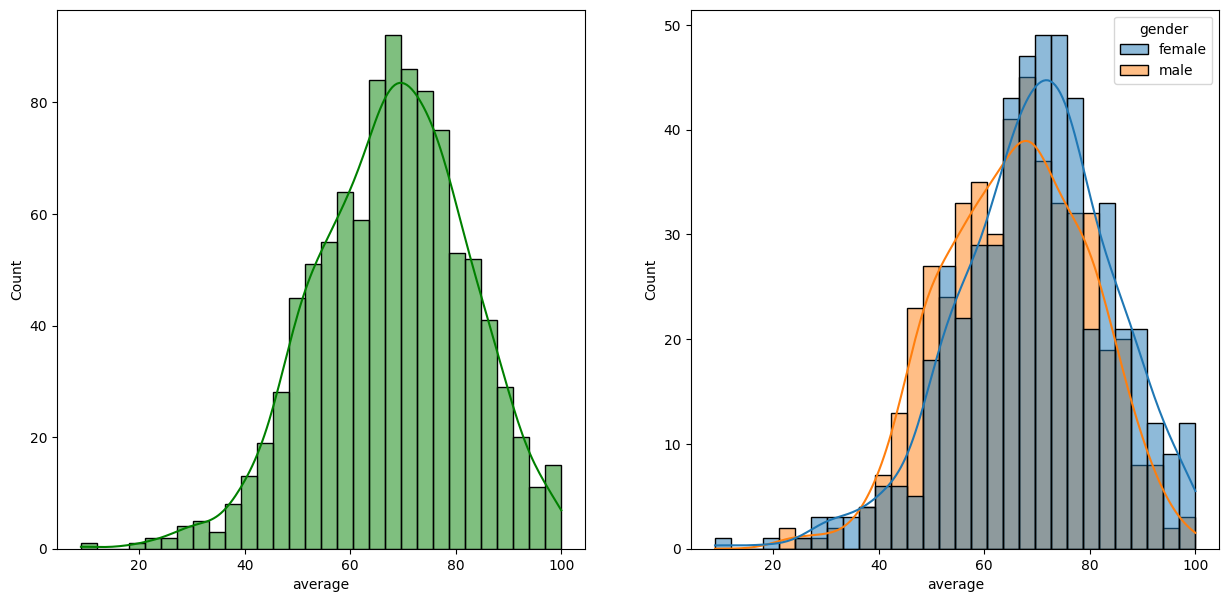

In [53]:
# data visualization 
fig,axs= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(x=df["average"],bins=30,color="g",kde=True)
plt.subplot(122)
sns.histplot(x=df["average"],bins=30,hue=df["gender"],kde=True)
plt.show()

we can see that the performance of female students is better compare to male students

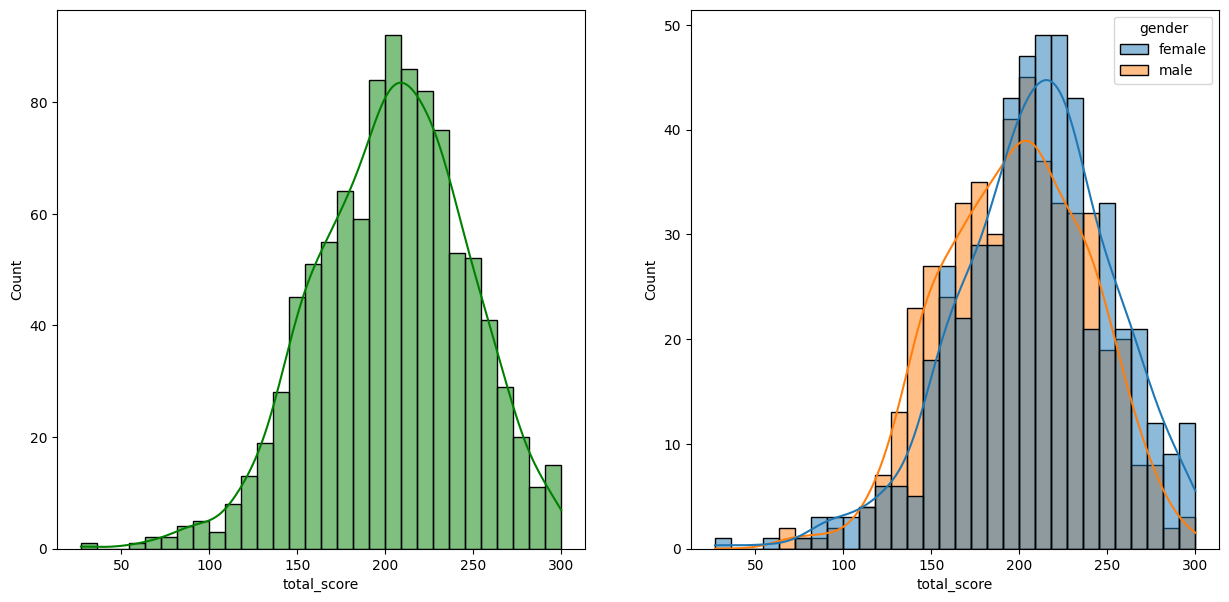

In [54]:
fig,axs= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(x=df["total_score"],bins=30,color="g",kde=True)
plt.subplot(122)
sns.histplot(x=df["total_score"],bins=30,hue=df["gender"],kde=True)
plt.show()

we can see that the performance of female students is better compare to male students

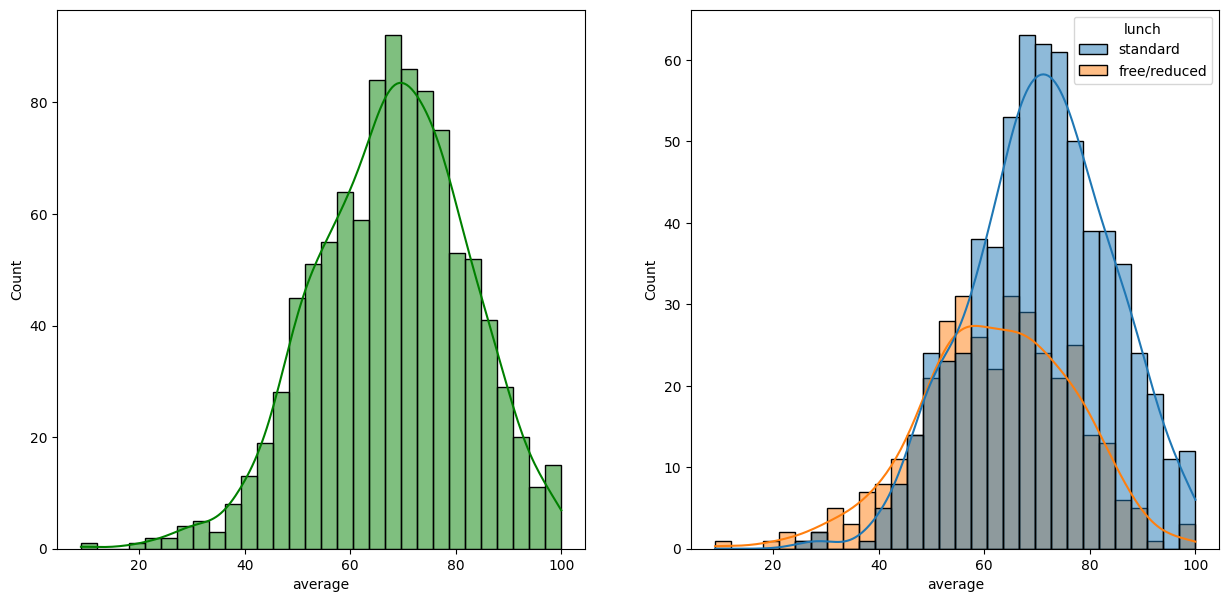

In [55]:
fig,axs= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(x=df["average"],bins=30,color="g",kde=True)
plt.subplot(122)
sns.histplot(x=df["average"],bins=30,hue=df["lunch"],kde=True)
plt.show()

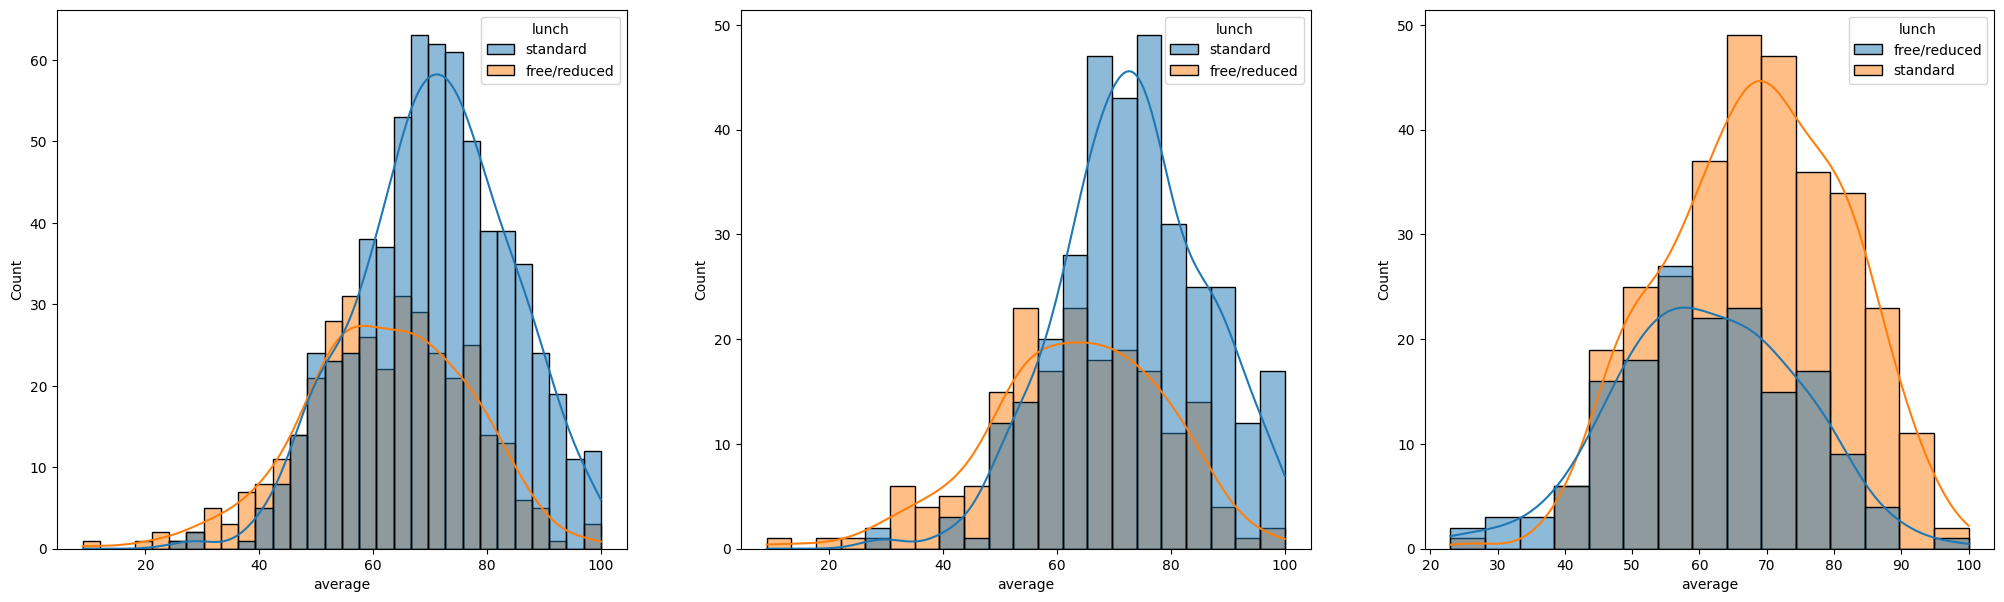

In [57]:
fig,axs= plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(x=df["average"],bins=30,hue=df["lunch"],kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue="lunch")
plt.show()

Standard lunch helps perform well in exams.
Standard lunch helps perform well in exams be it a male or a female.

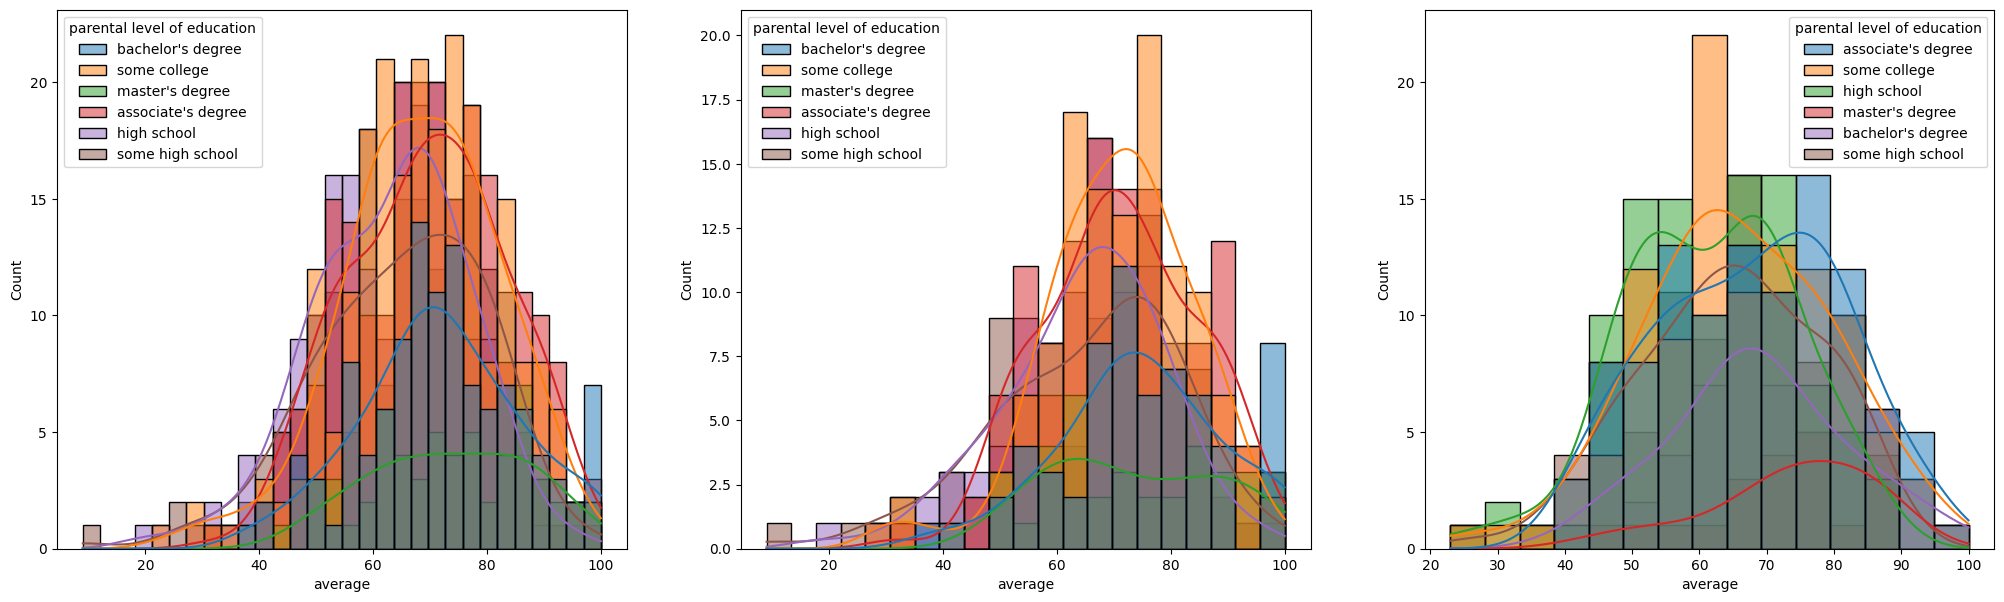

In [58]:
fig,axs= plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(x=df["average"],bins=30,hue=df["parental level of education"],kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue="parental level of education")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue="parental level of education")
plt.show()

In general parent's education don't help student perform well in exam.
2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3rd plot we can see there is no effect of parent's education on female students.

C:\Users\User\AppData\Local\Temp\ipykernel_2576\629525435.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\User\AppData\Local\Temp\ipykernel_2576\629525435.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\User\AppData\Local\Temp\ipykernel_2576\629525435.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


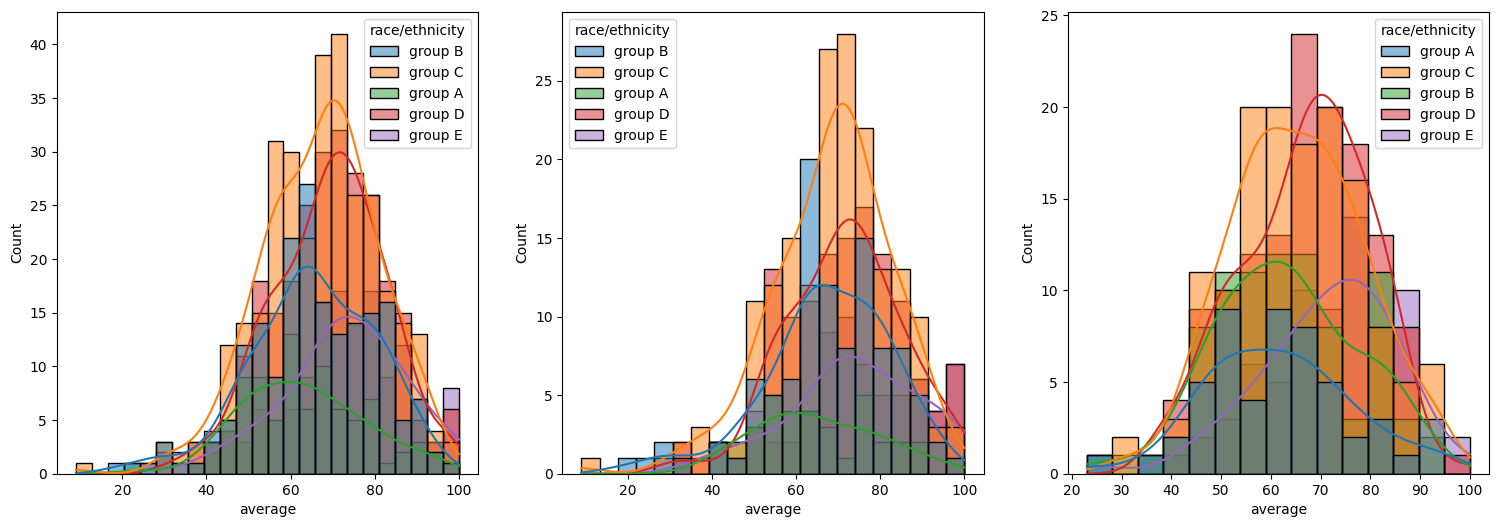

In [59]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

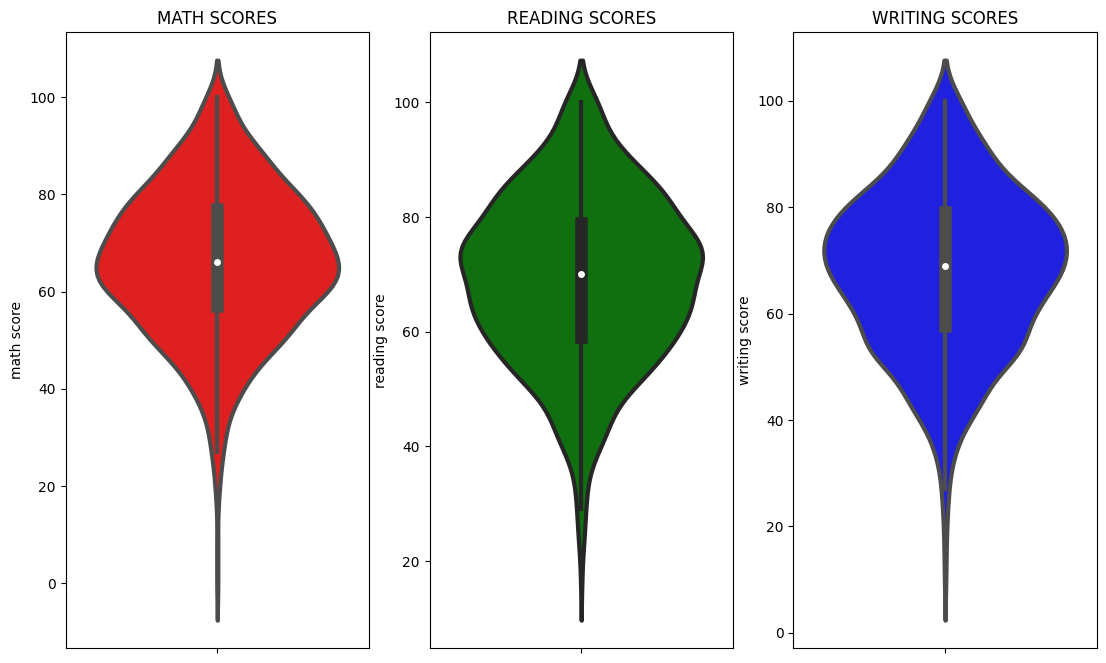

In [60]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

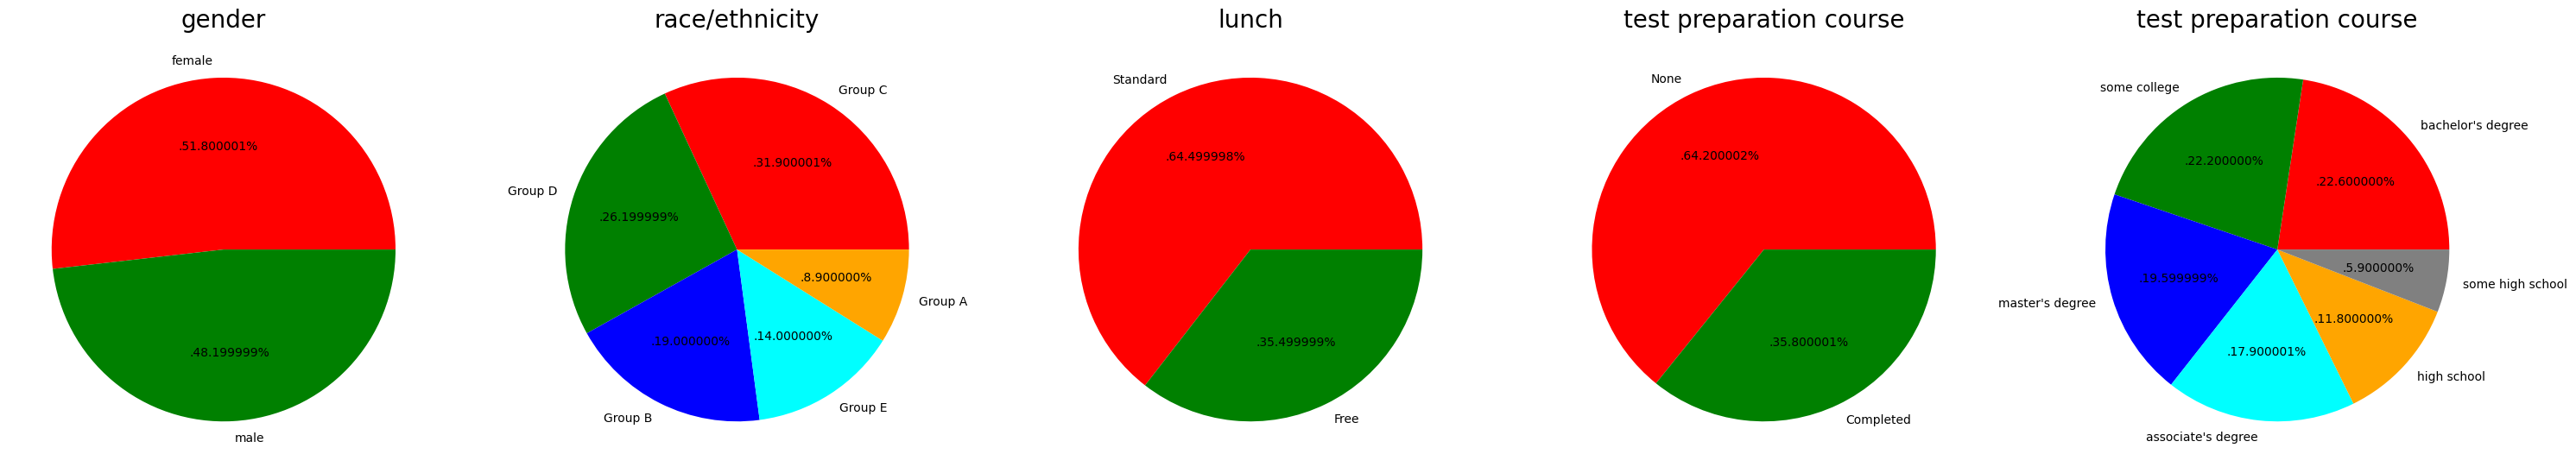

In [72]:
plt.figure(figsize=(30,12))

plt.subplot(1, 5, 1)
labels="female","male"
plt.pie(df["gender"].value_counts(),colors=["red","green",],labels=labels,autopct = '.%2f%%')
plt.title("gender",fontsize=20)

plt.subplot(1, 5, 2)
labels='Group C', 'Group D','Group B','Group E','Group A'
plt.pie(df["race/ethnicity"].value_counts(),colors=["red","green",'blue', 'cyan','orange'],labels=labels,autopct = '.%2f%%')
plt.title("race/ethnicity",fontsize=20)

plt.subplot(1, 5, 3)
labels='Standard', 'Free'
plt.pie(df["lunch"].value_counts(),colors=["red","green"],labels=labels,autopct = '.%2f%%')
plt.title("lunch",fontsize=20)

plt.subplot(1, 5, 4)
labels='None', 'Completed'
plt.pie(df["test preparation course"].value_counts(),colors=["red","green"],labels=labels,autopct = '.%2f%%')
plt.title("test preparation course",fontsize=20)

plt.subplot(1, 5, 5)
labels="bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'
       	
plt.pie(df["parental level of education"].value_counts(),colors=['red', 'green', 'blue', 'cyan','orange','grey'],labels=labels,autopct = '.%2f%%')
plt.title("test preparation course",fontsize=20)
#plt.tight_layout() is a function provided by the Matplotlib library 
# in Python, which automatically adjusts the padding and spacing between 
# subplots in a figure to make them fit better within the available space.
plt.tight_layout()
plt.grid()
plt.show()

Number of Male and Female students is almost equal
Number students are greatest in Group C
Number of students who have standard lunch are greater
Number of students who have not enrolled in any test preparation course is greater
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

In [70]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [17]:
plt.figure(figsize=(30,12))
plt.subplot(1,2,1)
sns.countplot(df["race/ethnicity"])
# for container in ax[0].containers:
#     ax[0].bar_label(container)
plt.subplot(1,2,2)
plt.pie(df["race/ethnicity"].value_counts(),labels=df["race/ethnicity"].value_counts().index,autopct='%1.1f%%')
plt.show()

TypeError: 'tuple' object is not callable

In [16]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

TypeError: 'tuple' object is not callable

In [24]:
df_groupby_race=df.groupby("race/ethnicity")
f,ax=plt.subplots(1,3,figsize=(30,10))
sns.barplot(x=df_groupby_race["math score"].mean().index,y=df_groupby_race["math score"].mean().values,ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)
plt.show()

TypeError: 'tuple' object is not callable

In [25]:
df_groupby_race = df.groupby("race/ethnicity")
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
sns.barplot(x=df_groupby_race["math score"].mean().index, y=df_groupby_race["math score"].mean().values, ax=axs[0])
axs[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
plt.show()

TypeError: 'tuple' object is not callable

Group E students have scored the highest marks.
Group A students have scored the lowest marks.
Students from a lower Socioeconomic status have a lower avg in all course subjects

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

TypeError: 'tuple' object is not callable

In [27]:

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

TypeError: 'tuple' object is not callable

In [28]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

TypeError: 'tuple' object is not callable

In [29]:
sns.pairplot(df,hue = 'gender')
plt.show()

TypeError: 'tuple' object is not callable

 Conclusions
Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.